<a href="https://colab.research.google.com/github/gustavo-ifusp/alumni_usp_analytics/blob/main/alumni_evolucao_cadastros_notebook_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tabula-py

     |████████████████████████████████| 12.0 MB 102 kB/s 


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import re
import tabula

#**Evolução de Cadastros**


Responsável: Gustavo de Andrade
gustavo@if.usp.br

In [ ]:
dados = pd.read_csv("evolucao_cadastros.csv")
dados

,"=""Data de cadastro"";=""Total"""
0,"=""18/10/2021"";49"
1,"=""17/10/2021"";25"
2,"=""16/10/2021"";18"
3,"=""15/10/2021"";31"
4,"=""14/10/2021"";87"
...,...
1839,"=""05/10/2016"";41"
1840,"=""04/10/2016"";10"
1841,"=""03/10/2016"";8"
1842,"=""02/10/2016"";1"


In [ ]:
dados['Datas'], dados['Total'] = dados['="Data de cadastro";="Total"'].str.split(';', 1).str
dados.drop(columns =['="Data de cadastro";="Total"'], inplace = True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [ ]:
n = 0
replace = ''
pattern = '=' #Substituir 
while n<=1843:
    string = dados['Datas'][n]
    dados['Datas'][n] = re.sub(pattern, replace, string)
    n += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados

,Datas,Total
0,18/10/2021,49
1,17/10/2021,25
2,16/10/2021,18
3,15/10/2021,31
4,14/10/2021,87
...,...,...
1839,05/10/2016,41
1840,04/10/2016,10
1841,03/10/2016,8
1842,02/10/2016,1


In [ ]:
dados['Total'] = dados['Total'].astype('int')
dados['Datas'] = pd.to_datetime(dados['Datas'])
dados["Datas"] = dados["Datas"].dt.year 

In [ ]:
evol = dados.groupby(['Datas'])['Total'].sum()
evol = pd.DataFrame(evol)
evol

,Total
Datas,
2016,3985
2017,15767
2018,20036
2019,14144
2020,22320
2021,15893


In [ ]:
evol = pd.DataFrame([[3985],[19752],[39788],[53932],[76252],[94611]], columns=['Total'], index=["2016", "2017","2018","2019","2020","2021"])
evol

,Total
2016,3985
2017,19752
2018,39788
2019,53932
2020,76252
2021,94611


Text(0.5, 1.0, 'Inscritros no ALUMNI USP')

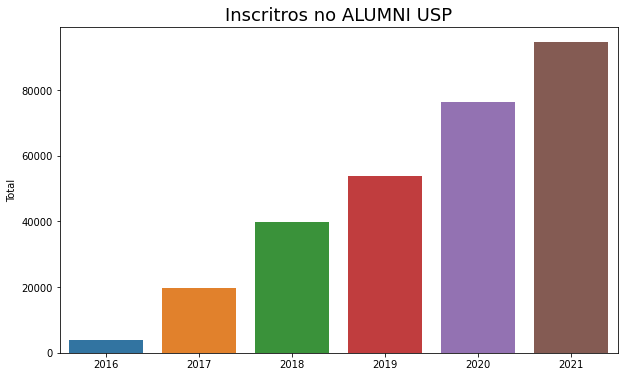

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=evol, x=evol.index, y='Total')
plt.title('Inscritros no ALUMNI USP', fontsize=18)

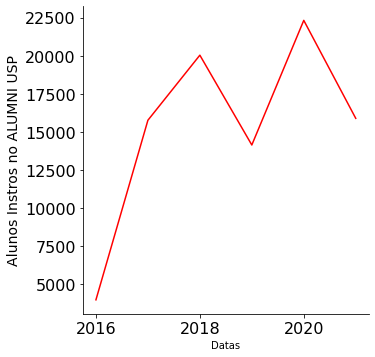

In [ ]:
sns.relplot(data=evol, x=evol.index, y='Total',  kind="line", color="r")
plt.ylabel('Alunos Instros no ALUMNI USP', fontsize=14)
plt.tick_params(labelsize=16)
plt.show()

**Cadastros por ano**

Text(0.5, 1.0, 'Cadastros por ano - ALUMNI USP')

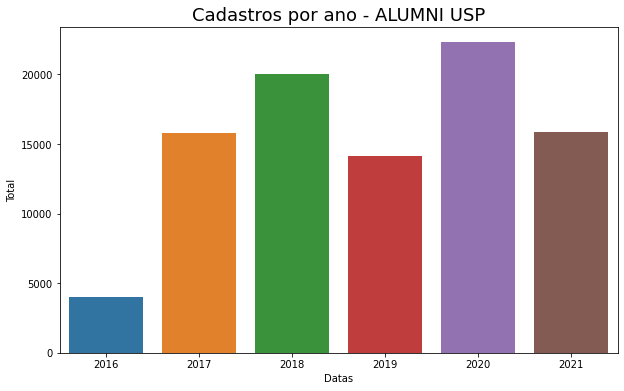

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=evol, x=evol.index, y='Total')
plt.title('Cadastros por ano - ALUMNI USP', fontsize=18)

#**Visualização de cadastrados**<br>
modelo lógico:<br>
a = Alunos diplomados<br>
b = Usuários no Aplicativo Alumni

integrantes_alumni = pd.DataFrame( [ [a - b], [b] ], ... )

<br>
Fonte: https://www.alumni.usp.br/alumniemnumeros/


Os gráficos do data usp em relação a cadastrados e não cadasdtrados estão errados porque estão levando em conta os usuários unicos do alumni, e sim o total de matriculas de pos e graduação, lembrando que existem alumnis que fizeram os dois. Um grande porcentual, que da exatamente a discrepancia apresentada, outra prova é que na tabela mostra o valor correto!

a = 327644<br> 
b = 94611<br>
( atualizado em 18/11/2021)

In [ ]:
integrantes_alumni = pd.DataFrame([[233157], [94611]], columns=['Total'], index=["Sem Cadastro", "Cadastrados"])
integrantes_alumni.info()
integrantes_alumni

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Sem Cadastro to Cadastrados
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


,Total
Sem Cadastro,233157
Cadastrados,94611


(-1.1153493050875054,
 1.1108279142718527,
 -1.1179435005585416,
 1.1008544524075496)

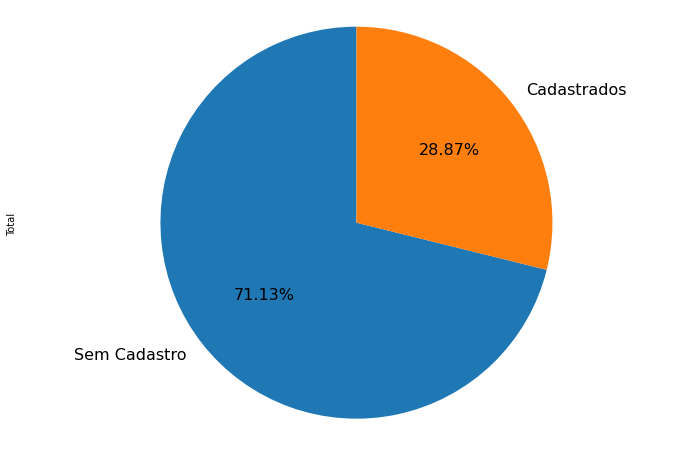

In [ ]:
fig = plt.figure(figsize=(12, 8))
integrantes_alumni.Total.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Para deixar o gráfico redondo

#**Visualização dos cadastrados por categoria de ensino**<br>
modelo lógico:<br>
a = Usuários no Aplicativo Alumni<br>
b = Usuários no Aplicativo Alumni - Graduação<br>
c = Usuários no Aplicativo Alumni - Pós<br>
d = Usuários no Aplicativo Alumni - Concluiu Ambos<br>

d = (b+c)-a


integrantes_alumni = pd.DataFrame( [ [b-d], [c-d], [d], ... )

<br>
Fonte: https://uspdigital.usp.br/datausp/publico/alumni/alumni.jsp?codmnu=7045


**Se (b-d) + (c-d) + (d) == a :**<br>
**teste se sanidade ==  True**

In [ ]:
integrantes_alumni_engaja = pd.DataFrame([[49182], [27715],[17590]], columns=['Total'], index=["Graduação", "Pós-Graduação","Concluintes de ambos"])
integrantes_alumni_engaja.info()
integrantes_alumni_engaja

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Graduação to Concluintes de ambos
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


,Total
Graduação,49182
Pós-Graduação,27715
Concluintes de ambos,17590


(-1.1074384759655236,
 1.1081248213419275,
 -1.1097454685412989,
 1.1004640699305381)

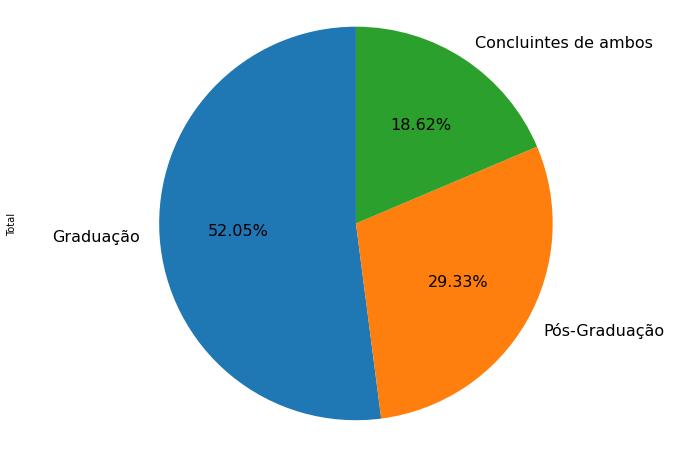

In [ ]:
fig = plt.figure(figsize=(12, 8))
integrantes_alumni_engaja.Total.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal')  # Para deixar o gráfico redondo

#**Perfil de atuação dos cadastrados.**

In [ ]:
data = pd.read_excel("perfil.xlsx")
data

,Ex-alunos,Sexo,Nível,Ano da titulação,Área de atuação,Distribuição da situação profissional
0,alumni 1,M,Doutorado,2019,Biológicas,NaN
1,alumni 2,M,Graduação,2011,Biológicas,NaN
2,alumni 3,M,Graduação,2013,Humanas,NaN
3,alumni 4,M,Graduação,2016,Humanas,NaN
4,alumni 5,M,Doutorado,2019,Humanas,Sou Empregado em Instituição Privada
...,...,...,...,...,...,...
92768,alumni 92769,F,Doutorado,1996,Biológicas,NaN
92769,alumni 92770,F,Doutorado,2010,Humanas,NaN
92770,alumni 92771,F,Mestrado,1985,Exatas,NaN
92771,alumni 92772,F,Mestrado,2021,Humanas,NaN


#**Distribuição da situação profissional**

In [ ]:
data1 =  pd.DataFrame()
data1['total'] = data.groupby(by='Distribuição da situação profissional').size()

In [ ]:
print(data1)

                                                  total
Distribuição da situação profissional                  
 Estou Aposentado                                    65
 Estou Procurando Emprego                           322
 Nenhuma das anteriores                             513
 Procuro meu Primeiro Emprego                        96
 Sou Empreendedor                                   232
 Sou Empregado em Instituição Privada               815
 Sou Empregado em Instituição Pública ou Privada    551
 Sou Estudante                                      184
 Sou Estudante com Bolsa                            321
 Sou Profissional Liberal                           385
 Sou Pós-doutorando                                 199
 Sou Servidor Público Estadual                      503
 Sou Servidor Público Federal                       624
 Sou Servidor Público Municipal                     159
 Trabalho Fora da minha área de formação             89
 Trabalho na minha área de formação             

In [ ]:
print("Total de respostas = ", df1.total.sum())

Total de respostas =  6436


Atualizado em 17/11

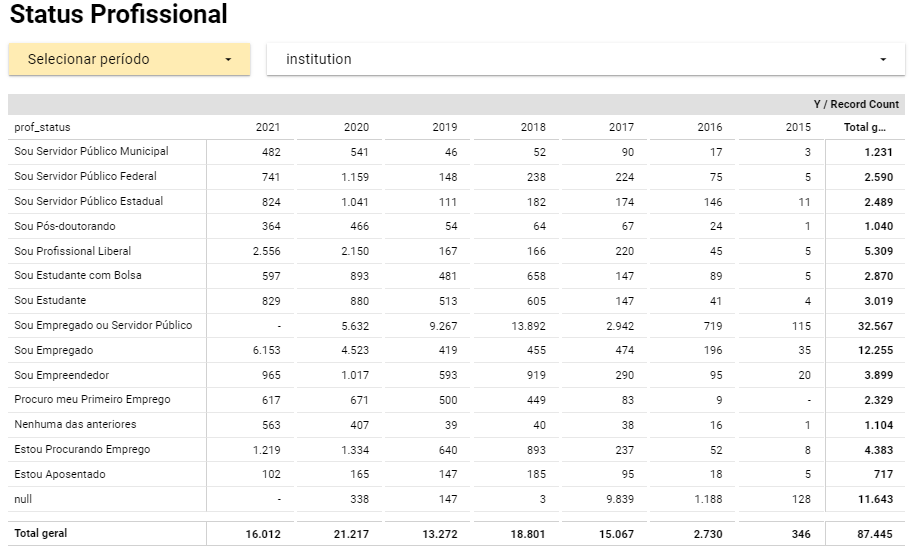

In [ ]:
file = "Dashboard_Alumni_USP.pdf"
df2 = pd.DataFrame()
df = tabula.read_pdf(file, pages = '1', multiple_tables = True)
df2 = df2.append(df, ignore_index=True)

In [ ]:
df2

,prof_status,2021,2020,2019,2018,2017,2016,Unnamed: 7,total_geral
1,Sou Servidor Público Municipal,482,541.000,46.000,52.000,90.000,17.0,3,1251
2,Sou Servidor Público Federal,741,1.159,148.000,238.000,224.000,75.0,5,2590
3,Sou Servidor Público Estadual,824,1.041,111.000,182.000,174.000,146.0,11,2489
4,Sou Pós-doutorando,364,466.000,54.000,64.000,67.000,24.0,1,1040
5,Sou Profissional Liberal,2.556,2.150,167.000,166.000,220.000,45.0,5,5309
6,Sou Estudante com Bolsa,597,893.000,481.000,658.000,147.000,89.0,5,2870
7,Sou Estudante,829,880.000,513.000,605.000,147.000,41.0,4,3019
8,Sou Empregado ou Servidor Público,-,5.632,9.267,13.892,2.942,719.0,115,32567
9,Sou Empregado,6.153,4.523,419.000,455.000,474.000,196.0,35,12255
10,Sou Empreendedor,965,1.017,593.000,919.000,290.000,95.0,20,3899


In [ ]:
df2 = df2.rename(columns={'Unnamed: 0': 'prof_status', 'Unnamed: 1':'2021','Unnamed: 2':'2020','Unnamed: 3':'2019','Unnamed: 4':'2018','Unnamed: 5':'2017', 'Unnamed: 6':'2016','Y / Record Count':'total_geral'})
df2 = df2[1:15]

In [ ]:
df2 = pd.DataFrame(df2)
df2.loc[df2['prof_status'] == 'Sou Pro ssional Liberal', 'prof_status'] = 'Sou Profissional Liberal'

In [ ]:
df2['total_geral'] = df2['total_geral'].replace("1.231","1251")
df2['total_geral'] = df2['total_geral'].replace("2.590","2590")
df2['total_geral'] = df2['total_geral'].replace("2.489","2489")
df2['total_geral'] = df2['total_geral'].replace("1.040","1040")
df2['total_geral'] = df2['total_geral'].replace("5.309","5309")
df2['total_geral'] = df2['total_geral'].replace("2.870","2870")
df2['total_geral'] = df2['total_geral'].replace("3.019","3019")
df2['total_geral'] = df2['total_geral'].replace("32.567","32567")
df2['total_geral'] = df2['total_geral'].replace("12.255","12255")
df2['total_geral'] = df2['total_geral'].replace("3.899","3899")
df2['total_geral'] = df2['total_geral'].replace("2.329","2329")
df2['total_geral'] = df2['total_geral'].replace("1.104","1104")
df2['total_geral'] = df2['total_geral'].replace("4.383","4383")

In [ ]:
df2['total_geral'] = df2['total_geral'].astype('int')
df2

,prof_status,2021,2020,2019,2018,2017,2016,Unnamed: 7,total_geral
1,Sou Servidor Público Municipal,482,541.000,46.000,52.000,90.000,17.0,3,1251
2,Sou Servidor Público Federal,741,1.159,148.000,238.000,224.000,75.0,5,2590
3,Sou Servidor Público Estadual,824,1.041,111.000,182.000,174.000,146.0,11,2489
4,Sou Pós-doutorando,364,466.000,54.000,64.000,67.000,24.0,1,1040
5,Sou Profissional Liberal,2.556,2.150,167.000,166.000,220.000,45.0,5,5309
6,Sou Estudante com Bolsa,597,893.000,481.000,658.000,147.000,89.0,5,2870
7,Sou Estudante,829,880.000,513.000,605.000,147.000,41.0,4,3019
8,Sou Empregado ou Servidor Público,-,5.632,9.267,13.892,2.942,719.0,115,32567
9,Sou Empregado,6.153,4.523,419.000,455.000,474.000,196.0,35,12255
10,Sou Empreendedor,965,1.017,593.000,919.000,290.000,95.0,20,3899


In [ ]:
df2 = df2.sort_values(by=['total_geral'], ascending=False)
df2

,prof_status,2021,2020,2019,2018,2017,2016,Unnamed: 7,total_geral
8,Sou Empregado ou Servidor Público,-,5.632,9.267,13.892,2.942,719.0,115,32567
9,Sou Empregado,6.153,4.523,419.000,455.000,474.000,196.0,35,12255
5,Sou Profissional Liberal,2.556,2.150,167.000,166.000,220.000,45.0,5,5309
13,Estou Procurando Emprego,1.219,1.334,640.000,893.000,237.000,52.0,8,4383
10,Sou Empreendedor,965,1.017,593.000,919.000,290.000,95.0,20,3899
7,Sou Estudante,829,880.000,513.000,605.000,147.000,41.0,4,3019
6,Sou Estudante com Bolsa,597,893.000,481.000,658.000,147.000,89.0,5,2870
2,Sou Servidor Público Federal,741,1.159,148.000,238.000,224.000,75.0,5,2590
3,Sou Servidor Público Estadual,824,1.041,111.000,182.000,174.000,146.0,11,2489
11,Procuro meu Primeiro Emprego,617,671.000,500.000,449.000,83.000,9.0,-,2329


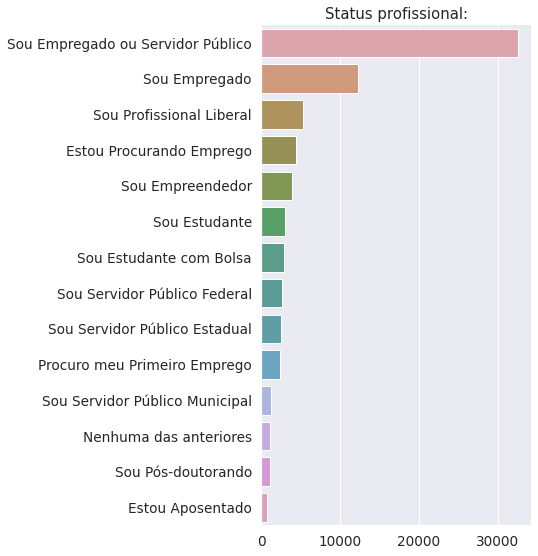

In [ ]:
sns.set(font_scale = 1.24)
g = sns.catplot(x="total_geral", y='prof_status', data=df2, height=8, kind="bar", saturation=.5, ci=float)
g.set(title = "Status profissional:")
g.set_axis_labels("", "")

#**Área de Atuação**

In [ ]:
data

,Ex-alunos,Sexo,Nível,Ano da titulação,Área de atuação,Distribuição da situação profissional
0,alumni 1,M,Doutorado,2019,Biológicas,NaN
1,alumni 2,M,Graduação,2011,Biológicas,NaN
2,alumni 3,M,Graduação,2013,Humanas,NaN
3,alumni 4,M,Graduação,2016,Humanas,NaN
4,alumni 5,M,Doutorado,2019,Humanas,Sou Empregado em Instituição Privada
...,...,...,...,...,...,...
92768,alumni 92769,F,Doutorado,1996,Biológicas,NaN
92769,alumni 92770,F,Doutorado,2010,Humanas,NaN
92770,alumni 92771,F,Mestrado,1985,Exatas,NaN
92771,alumni 92772,F,Mestrado,2021,Humanas,NaN


In [ ]:
data2 = pd.DataFrame()
data2['total'] = data.groupby(by='Área de atuação').size()
data2

,total
Área de atuação,
Biológicas,30117
Exatas,28987
Humanas,33669


(-1.1073176311391386,
 1.1180336241691045,
 -1.1131285748366346,
 1.100625170230316)

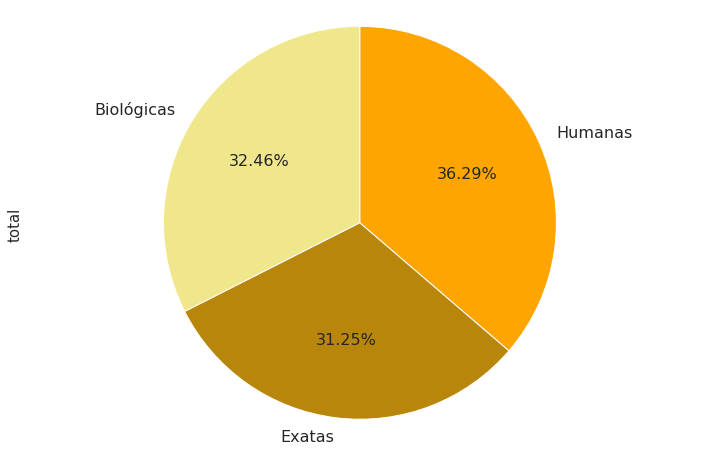

In [ ]:
fig = plt.figure(figsize=(12, 8))
data2.total.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16}, colors=['khaki', 'darkgoldenrod','orange'])
plt.axis('equal')  # Para deixar o gráfico redondo

In [ ]:
link = "https://datastudio.google.com/s/ufY8gOACHTo" # tentar abrir dataframe atraves do link